### Part A

In [1]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B

# Importing  

In [2]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
# Import tree classifier
from sklearn import tree
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# Import StandrdSclaer for preprocessing
from sklearn.preprocessing import StandardScaler
#Import svm model
from sklearn import svm
# Importing SVC
from sklearn.svm import SVC
# import pandas with shortcut 'pd'
import pandas as pd
# import numpy with shortcut 'np'
import numpy as np

# Loading the data

In [3]:
# read_csv function which is used to read the required CSV file
data = pd.read_csv('CE802_P2_Data.csv')
# data here used to display the file imported
data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,-28703.964,0.73,-4.051752,-6.99630,1473.45,0,4.40510,16004.16,1,-11645.820,...,-13.7350,5.9854,14.24730,1.4892,9959.04,-3199.350,6.8670,-4850.820,NaN,False
1,-28726.730,1.73,-5.153000,-4.27404,783.15,0,4.54500,16041.48,1,-9759.420,...,-5.1710,4.6222,14.99820,3.1206,10107.44,-3064.950,9.4710,378.780,NaN,True
2,-28717.120,0.73,-8.440000,-8.25900,2573.95,0,3.59962,16422.78,0,-10775.220,...,-38.6500,4.4096,17.79000,1.9818,10971.04,-3638.850,2.0373,-5215.480,NaN,False
3,-81470.290,0.73,-4.386600,-5.57460,1499.68,0,3.56675,16270.04,1,-9416.714,...,-8.6390,8.5080,12.98424,11.5620,9681.10,724.950,2.0220,-4378.420,NaN,False
4,-28750.800,1.73,-4.650200,-4.33848,1409.15,1,5.07000,16548.78,1,-9797.820,...,-14.7300,5.5188,13.57260,2.5440,10965.64,-2607.150,4.3140,-1919.220,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-28685.380,0.73,-4.095060,-15.54300,1654.77,1,4.09930,16381.38,0,-9861.820,...,-19.3800,6.4440,13.15350,3.2538,10170.64,-3932.850,1.4196,-5053.546,-10.75,False
996,-28668.770,1.73,-4.050914,-9.18600,1457.85,0,4.36770,16036.38,0,-9418.336,...,-31.7600,4.7966,14.72040,13.4190,9607.28,-3421.860,1.6728,-4964.700,-10.35,False
997,-28667.610,1.73,-4.887000,-11.41200,1515.96,0,5.01500,16097.92,1,-10209.620,...,-19.6400,6.4060,13.55100,2.1246,10907.64,-2875.950,2.6988,-4965.880,-11.01,True
998,-28750.050,0.73,-5.490800,-5.07480,2249.25,0,3.88900,16120.46,1,-9358.160,...,-6.4210,4.5810,16.77000,4.0221,9815.54,-3513.039,6.1860,-4261.020,NaN,False


<AxesSubplot:>

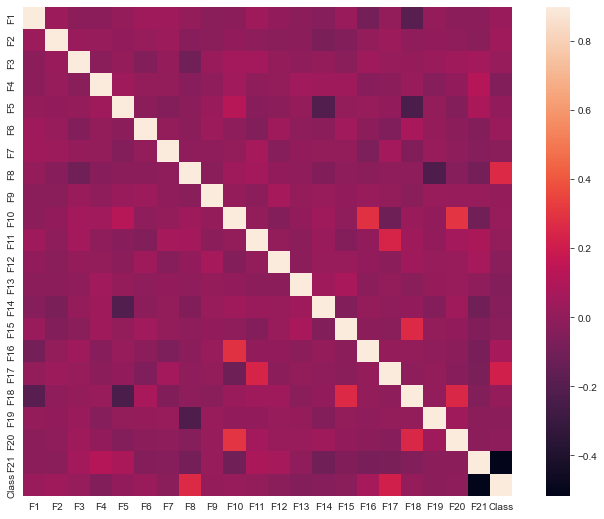

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

corrmat = data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

# Imputation

There are main ways to do imputation for fillling the missing values. Here, I have try Four types:
1. Mean
2. Deleting the Column
3. Replacing the NaN with Zero(0)
4. Median

1. Using Mean for filling the missing values

In [5]:
# Use of mean function to fill the missing values in column F21
data['F21'] = data['F21'].replace(np.NaN, data['F21'].mean())
# Printing the column to show the filled values
print(data['F21'][:1000])

0     -10.18352
1     -10.18352
2     -10.18352
3     -10.18352
4     -10.18352
         ...   
995   -10.75000
996   -10.35000
997   -11.01000
998   -10.18352
999   -10.18352
Name: F21, Length: 1000, dtype: float64


In [6]:
# head is a function which is use to show the first 5 rows values
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,-28703.964,0.73,-4.051752,-6.99630,1473.45,0,4.40510,16004.16,1,-11645.820,...,-13.735,5.9854,14.24730,1.4892,9959.04,-3199.35,6.8670,-4850.82,-10.18352,False
1,-28726.730,1.73,-5.153000,-4.27404,783.15,0,4.54500,16041.48,1,-9759.420,...,-5.171,4.6222,14.99820,3.1206,10107.44,-3064.95,9.4710,378.78,-10.18352,True
2,-28717.120,0.73,-8.440000,-8.25900,2573.95,0,3.59962,16422.78,0,-10775.220,...,-38.650,4.4096,17.79000,1.9818,10971.04,-3638.85,2.0373,-5215.48,-10.18352,False
3,-81470.290,0.73,-4.386600,-5.57460,1499.68,0,3.56675,16270.04,1,-9416.714,...,-8.639,8.5080,12.98424,11.5620,9681.10,724.95,2.0220,-4378.42,-10.18352,False
4,-28750.800,1.73,-4.650200,-4.33848,1409.15,1,5.07000,16548.78,1,-9797.820,...,-14.730,5.5188,13.57260,2.5440,10965.64,-2607.15,4.3140,-1919.22,-10.18352,True


# Spliting the Data

In this section, we are spliting the loaded data into two variables X and y. In X, we have all the columns data except the class column values as they are moved to y.

In [7]:
# Class column is splitted in to y variable from csv data file
y = data.Class
# data is moved to x variable by dropping Class Column
X = data.drop('Class', axis=1)
# Here head is used to print first 10 rows
X.head(10)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
0,-28703.964,0.73,-4.051752,-6.99630,1473.45,0,4.40510,16004.16,1,-11645.820,...,24.44400,-13.735,5.9854,14.24730,1.48920,9959.04,-3199.35,6.86700,-4850.82,-10.18352
1,-28726.730,1.73,-5.153000,-4.27404,783.15,0,4.54500,16041.48,1,-9759.420,...,50.59500,-5.171,4.6222,14.99820,3.12060,10107.44,-3064.95,9.47100,378.78,-10.18352
2,-28717.120,0.73,-8.440000,-8.25900,2573.95,0,3.59962,16422.78,0,-10775.220,...,38.82552,-38.650,4.4096,17.79000,1.98180,10971.04,-3638.85,2.03730,-5215.48,-10.18352
3,-81470.290,0.73,-4.386600,-5.57460,1499.68,0,3.56675,16270.04,1,-9416.714,...,39.59310,-8.639,8.5080,12.98424,11.56200,9681.10,724.95,2.02200,-4378.42,-10.18352
4,-28750.800,1.73,-4.650200,-4.33848,1409.15,1,5.07000,16548.78,1,-9797.820,...,39.95820,-14.730,5.5188,13.57260,2.54400,10965.64,-2607.15,4.31400,-1919.22,-10.18352
5,-28705.287,1.73,-5.185600,-11.22600,1250.15,0,4.23280,17286.18,1,-9435.880,...,51.86100,-6.654,4.7846,13.44120,2.31270,9762.90,-2841.45,2.94870,-4973.60,-11.68000
6,-28664.510,1.73,-5.188800,-6.61470,1079.35,1,3.61638,9467.98,1,-15433.820,...,52.62000,-7.631,4.6290,15.41340,1.32114,9905.84,-3290.13,0.45504,-4813.82,-9.55000
7,-28709.973,1.73,-7.898000,-8.76000,1084.95,1,4.25490,16397.18,1,-10107.020,...,27.74400,-10.322,4.6420,13.85250,2.23650,15152.24,-2912.85,1.80240,-4898.22,-10.18352
8,-28624.220,1.73,-5.642400,-5.03670,2533.25,0,4.01400,13923.98,0,-9682.420,...,2.10000,-15.240,4.6122,13.43340,3.09300,9359.04,-4876.95,0.60300,-5530.62,-10.18352
9,-28692.215,1.73,-5.126600,-9.28800,1769.45,0,5.86100,12569.98,1,-10185.820,...,60.81600,-7.892,7.9520,18.26100,2.25360,9203.84,-3756.27,0.99150,-5235.74,-10.18352


# Training and Testing

In this part, we have divided our data stored in X and y into X_train, X_test, y_train and y_test. Here, we have also used the train_test_split function which divides the data into trai and test. The division of data is in the ratio of 80% in Train and 20% in Test.

In [8]:
# Distribution of data into train and test of X and y.
# train_test_split function used for distribution of data.
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
# Printing the text
print("\nX_train:\n")
# Printing 5 rows of X_train
print(X_train.head())
# Printing the current shape of array
print(X_train.shape)

# Printing the text
print("\nX_test:\n")
# Printing 5 rows of X_test
print(X_test.head())
# Printing the current shape of array
print(X_test.shape)

# Printing the text
print("\ny_train:\n")
# Printing 5 rows of y_train
print(y_train.head())
# Printing the current shape of array
print(y_train.shape)

# Printing the text
print("\ny_train:\n")
# Printing 5 rows of y_train
print(y_test.head())
# Printing the current shape of array
print(y_test.shape)


X_train:

            F1    F2       F3      F4       F5  F6      F7        F8  F9  \
62  -28693.554  0.73 -4.24140 -9.6870  1550.53   1  4.4314  16489.58   1   
386 -28666.730  1.73 -5.70500 -7.5000  1733.95   0  4.0577  19635.98   0   
940 -28730.260  0.73 -6.97600 -6.3879  2055.15   0  4.1217  16734.98   0   
748 -28679.930  1.73 -4.18670 -5.3148 -1015.65   1  5.8780  16564.18   0   
839 -28713.930  1.73 -4.09368 -5.8365  1675.55   0  3.9959  16046.16   1   

         F10  ...     F12     F13      F14       F15      F16       F17  \
62  -9470.06  ...  58.359 -30.610  9.55000  14.90310   7.2030  10390.24   
386 -9210.28  ...  44.679  -5.887  8.73000  14.78100   4.4910   9938.04   
940 -9365.64  ...  30.735 -12.145  4.99940  17.76900  13.8840  10019.64   
748 -9906.02  ...  48.903  -9.442  4.27132  13.06815   2.8617   9544.94   
839 -8998.02  ...  50.730  -7.462  7.75000  14.24490   2.2656   9588.00   

         F18     F19      F20       F21  
62  -3313.38  5.6820 -4949.68 -10.18352

# Classifiers

In data science, a classifier is a type of machine learning algorithm used to assign a class label to a data input. Classifier algorithms are trained using labeled data; in the image recognition example, for instance, the classifier receives training data that labels images. After sufficient training, the classifier then can receive unlabeled images as inputs and will output classification labels for each image.

# Decision Tree Classifier

The decision tree classifier creates the classification model by building a decision tree. Each node in the tree specifies a test on an attribute, each branch descending from that node corresponds to one of the possible values for that attribute.

In [9]:
# random_state used for Decision Tree Classifier
DC = tree.DecisionTreeClassifier(random_state=40)
# Use of .fit function for achieveing better accuracy
DC.fit(X_train, y_train)
# Prediction for DT classifier
y_p = DC.predict(X_test)
# accuracy_score is used to return mean accuracy on the given test data and labels
acc = accuracy_score(y_test, y_p)
# Printing the Accuracy of DT
print('Accuracy', acc)

Accuracy 0.795


# KNN Classifier

k-NN is a type of classification where the function is only approximated locally and all computation is deferred until function evaluation. Since this algorithm relies on distance for classification, if the features represent different physical units or come in vastly different scales then normalizing the training data can improve its accuracy dramatically

In [10]:
# n_neighbors used for k-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=1)
# Use of .fit function for achieveing better accuracy
knn.fit(X_train, y_train)
# Prediction for KNN classifier
y_p = knn.predict(X_test)
# accuracy_score is used to return mean accuracy on the given test data and labels
acc = accuracy_score(y_test, y_p)
# Printing the Accuracy of KNN
print('Accuracy', acc)

Accuracy 0.66


# Random Forest Classifier

Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset. Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

In [11]:
# n_estimators used for Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100)
# Use of .fit function for achieveing better accuracy
rfc.fit(X_train,y_train)
# Prediction for random forest classifier
y_p = rfc.predict(X_test)
# accuracy_score is used to return mean accuracy on the given test data and labels
acc = accuracy_score(y_test, y_p)
# Printing the accuracy value
print('Accuracy', acc)

Accuracy 0.875


# Support Virtual Machine

SVM is a supervised machine learning algorithm which can be used for classification or regression problems. It uses a technique called the kernel trick to transform your data and then based on these transformations it finds an optimal boundary between the possible outputs. Simply put, it does some extremely complex data transformations, then figures out how to seperate your data based on the labels or outputs you've defined.

In [12]:
# Linear support vector classifier used for better fitting
Support = svm.SVC(kernel='linear')
# Use of .fit function for achieveing better accuracy
Support.fit(X_train, y_train)
# Prediction for svm
y_p = Support.predict(X_test)
# accuracy_score is used to return mean accuracy on the given test data and labels
acc = accuracy_score(y_test, y_p)
# Printing the Accuracy of SVM
print('Accuracy', acc)

Accuracy 0.75


# 2. Deleting the Column

In [13]:
# values of F21 column moved to list_drop 
list_drop = ['F21']
# Use of drop functon for delecting the unrequired data
data.drop(list_drop, axis=1, inplace=True)
# head is a function which is use to show the first 5 rows values
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,Class
0,-28703.964,0.73,-4.051752,-6.99630,1473.45,0,4.40510,16004.16,1,-11645.820,...,24.44400,-13.735,5.9854,14.24730,1.4892,9959.04,-3199.35,6.8670,-4850.82,False
1,-28726.730,1.73,-5.153000,-4.27404,783.15,0,4.54500,16041.48,1,-9759.420,...,50.59500,-5.171,4.6222,14.99820,3.1206,10107.44,-3064.95,9.4710,378.78,True
2,-28717.120,0.73,-8.440000,-8.25900,2573.95,0,3.59962,16422.78,0,-10775.220,...,38.82552,-38.650,4.4096,17.79000,1.9818,10971.04,-3638.85,2.0373,-5215.48,False
3,-81470.290,0.73,-4.386600,-5.57460,1499.68,0,3.56675,16270.04,1,-9416.714,...,39.59310,-8.639,8.5080,12.98424,11.5620,9681.10,724.95,2.0220,-4378.42,False
4,-28750.800,1.73,-4.650200,-4.33848,1409.15,1,5.07000,16548.78,1,-9797.820,...,39.95820,-14.730,5.5188,13.57260,2.5440,10965.64,-2607.15,4.3140,-1919.22,True


In [14]:
# Class column is splitted in to y variable from csv data file
y = data.Class
# data is moved to x variable by dropping Class Column
X = data.drop('Class', axis=1)
# Here head is used to print first 10 rows
X.head(10)


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20
0,-28703.964,0.73,-4.051752,-6.99630,1473.45,0,4.40510,16004.16,1,-11645.820,-1.33420,24.44400,-13.735,5.9854,14.24730,1.48920,9959.04,-3199.35,6.86700,-4850.82
1,-28726.730,1.73,-5.153000,-4.27404,783.15,0,4.54500,16041.48,1,-9759.420,-1.60960,50.59500,-5.171,4.6222,14.99820,3.12060,10107.44,-3064.95,9.47100,378.78
2,-28717.120,0.73,-8.440000,-8.25900,2573.95,0,3.59962,16422.78,0,-10775.220,-0.49086,38.82552,-38.650,4.4096,17.79000,1.98180,10971.04,-3638.85,2.03730,-5215.48
3,-81470.290,0.73,-4.386600,-5.57460,1499.68,0,3.56675,16270.04,1,-9416.714,-4.56800,39.59310,-8.639,8.5080,12.98424,11.56200,9681.10,724.95,2.02200,-4378.42
4,-28750.800,1.73,-4.650200,-4.33848,1409.15,1,5.07000,16548.78,1,-9797.820,-1.02500,39.95820,-14.730,5.5188,13.57260,2.54400,10965.64,-2607.15,4.31400,-1919.22
5,-28705.287,1.73,-5.185600,-11.22600,1250.15,0,4.23280,17286.18,1,-9435.880,-3.34400,51.86100,-6.654,4.7846,13.44120,2.31270,9762.90,-2841.45,2.94870,-4973.60
6,-28664.510,1.73,-5.188800,-6.61470,1079.35,1,3.61638,9467.98,1,-15433.820,-2.38000,52.62000,-7.631,4.6290,15.41340,1.32114,9905.84,-3290.13,0.45504,-4813.82
7,-28709.973,1.73,-7.898000,-8.76000,1084.95,1,4.25490,16397.18,1,-10107.020,-0.44570,27.74400,-10.322,4.6420,13.85250,2.23650,15152.24,-2912.85,1.80240,-4898.22
8,-28624.220,1.73,-5.642400,-5.03670,2533.25,0,4.01400,13923.98,0,-9682.420,-1.37600,2.10000,-15.240,4.6122,13.43340,3.09300,9359.04,-4876.95,0.60300,-5530.62
9,-28692.215,1.73,-5.126600,-9.28800,1769.45,0,5.86100,12569.98,1,-10185.820,-1.59580,60.81600,-7.892,7.9520,18.26100,2.25360,9203.84,-3756.27,0.99150,-5235.74


In [15]:
# Distribution of data into train and test of X and y.
# train_test_split function used for distribution of data.
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
# Printing the text
print("\nX_train:\n")
# Printing 5 rows of X_train
print(X_train.head())
# Printing the current shape of array
print(X_train.shape)

# Printing the text
print("\nX_test:\n")
# Printing 5 rows of X_test
print(X_test.head())
# Printing the current shape of array
print(X_test.shape)

# Printing the text
print("\ny_train:\n")
# Printing 5 rows of y_train
print(y_train.head())
# Printing the current shape of array
print(y_train.shape)

# Printing the text
print("\ny_train:\n")
# Printing 5 rows of y_train
print(y_test.head())
# Printing the current shape of array
print(y_test.shape)


X_train:

            F1    F2       F3       F4       F5  F6      F7        F8  F9  \
845 -28707.604  1.73 -4.05944 -12.0090  1938.45   0  5.7640  11221.98   0   
251 -28703.189  1.73 -6.22800  -6.2829  2213.15   0  4.2432  15800.78   1   
658 -28697.084  1.73 -5.57340  -6.8979  1790.75   1  6.2060  16413.18   1   
10  -28751.500  1.73 -4.44160  -5.2638  1531.13   1  4.1887  17917.78   0   
669 -28691.934  0.73 -5.00440  -6.3384  1777.05   0  3.6836  16410.58   0   

           F10     F11       F12     F13     F14     F15      F16      F17  \
845  -9621.820 -0.8398  28.01400 -18.680  5.4396  14.328  4.43100  9363.64   
251  -9357.620 -2.5040  38.74668  -6.936  4.7114  18.561  3.82710  9777.40   
658 -10869.020 -2.0432  44.97600 -10.959  6.9640  17.121  1.59360  9977.44   
10   -9402.162 -1.3698  53.31300  -5.773  7.4420  15.912  6.42600  9589.30   
669 -11067.420 -2.7580  55.25700  -6.499  6.1860  19.644  1.28415  9569.44   

          F18      F19      F20  
845 -4058.550  0.39687 

# Decision Tree Classifiers

In [16]:
# random_state used for Decision Tree Classifier
DC = tree.DecisionTreeClassifier(random_state=40)
# Use of .fit function for achieveing better accuracy
DC.fit(X_train, y_train)
# Prediction for DT classifier
y_p = DC.predict(X_test)
# accuracy_score is used to return mean accuracy on the given test data and labels
acc = accuracy_score(y_test, y_p)
# Printing the Accuracy of DT
print('Accuracy', acc)


Accuracy 0.845


# KNN Classifier

In [17]:
# n_neighbors used for k-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=1)
# Use of .fit function for achieveing better accuracy
knn.fit(X_train, y_train)
# Prediction for KNN classifier
y_p = knn.predict(X_test)
# accuracy_score is used to return mean accuracy on the given test data and labels
acc = accuracy_score(y_test, y_p)
# Printing the Accuracy of KNN
print('Accuracy', acc)


Accuracy 0.585


# Random Forest Classifier

In [18]:
# n_estimators used for Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100)
# Use of .fit function for achieveing better accuracy
rfc.fit(X_train,y_train)
# Prediction for random forest classifier
y_p = rfc.predict(X_test)
# accuracy_score is used to return mean accuracy on the given test data and labels
acc = accuracy_score(y_test, y_p)
# Printing the accuracy value
print('Accuracy', acc)

Accuracy 0.84


# Support Vector Machine

In [19]:
# Linear support vector classifier used for better fitting
Support = svm.SVC(kernel='linear')
# Use of .fit function for achieveing better accuracy
Support.fit(X_train, y_train)
# Prediction for svm
y_p = Support.predict(X_test)
# accuracy_score is used to return mean accuracy on the given test data and labels
acc = accuracy_score(y_test, y_p)
# Printing the Accuracy of SVM
print('Accuracy', acc)

Accuracy 0.63


# 3. Replacing the NaN with Zero(0)

In [20]:
# read_csv function which is used to read the required CSV file
data = pd.read_csv('CE802_P2_Data.csv')
# data here used to display the file imported
data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,-28703.964,0.73,-4.051752,-6.99630,1473.45,0,4.40510,16004.16,1,-11645.820,...,-13.7350,5.9854,14.24730,1.4892,9959.04,-3199.350,6.8670,-4850.820,NaN,False
1,-28726.730,1.73,-5.153000,-4.27404,783.15,0,4.54500,16041.48,1,-9759.420,...,-5.1710,4.6222,14.99820,3.1206,10107.44,-3064.950,9.4710,378.780,NaN,True
2,-28717.120,0.73,-8.440000,-8.25900,2573.95,0,3.59962,16422.78,0,-10775.220,...,-38.6500,4.4096,17.79000,1.9818,10971.04,-3638.850,2.0373,-5215.480,NaN,False
3,-81470.290,0.73,-4.386600,-5.57460,1499.68,0,3.56675,16270.04,1,-9416.714,...,-8.6390,8.5080,12.98424,11.5620,9681.10,724.950,2.0220,-4378.420,NaN,False
4,-28750.800,1.73,-4.650200,-4.33848,1409.15,1,5.07000,16548.78,1,-9797.820,...,-14.7300,5.5188,13.57260,2.5440,10965.64,-2607.150,4.3140,-1919.220,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-28685.380,0.73,-4.095060,-15.54300,1654.77,1,4.09930,16381.38,0,-9861.820,...,-19.3800,6.4440,13.15350,3.2538,10170.64,-3932.850,1.4196,-5053.546,-10.75,False
996,-28668.770,1.73,-4.050914,-9.18600,1457.85,0,4.36770,16036.38,0,-9418.336,...,-31.7600,4.7966,14.72040,13.4190,9607.28,-3421.860,1.6728,-4964.700,-10.35,False
997,-28667.610,1.73,-4.887000,-11.41200,1515.96,0,5.01500,16097.92,1,-10209.620,...,-19.6400,6.4060,13.55100,2.1246,10907.64,-2875.950,2.6988,-4965.880,-11.01,True
998,-28750.050,0.73,-5.490800,-5.07480,2249.25,0,3.88900,16120.46,1,-9358.160,...,-6.4210,4.5810,16.77000,4.0221,9815.54,-3513.039,6.1860,-4261.020,NaN,False


In [21]:
data['F21'] = data['F21'].replace(np.nan, 0)
# Printing the column to show the filled values
print(data['F21'][:1000])

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
995   -10.75
996   -10.35
997   -11.01
998     0.00
999     0.00
Name: F21, Length: 1000, dtype: float64


In [22]:
# Class column is splitted in to y variable from csv data file
y = data.Class
# data is moved to x variable by dropping Class Column
X = data.drop('Class', axis=1)
# Here head is used to print first 10 rows
X.head(10)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
0,-28703.964,0.73,-4.051752,-6.99630,1473.45,0,4.40510,16004.16,1,-11645.820,...,24.44400,-13.735,5.9854,14.24730,1.48920,9959.04,-3199.35,6.86700,-4850.82,0.00
1,-28726.730,1.73,-5.153000,-4.27404,783.15,0,4.54500,16041.48,1,-9759.420,...,50.59500,-5.171,4.6222,14.99820,3.12060,10107.44,-3064.95,9.47100,378.78,0.00
2,-28717.120,0.73,-8.440000,-8.25900,2573.95,0,3.59962,16422.78,0,-10775.220,...,38.82552,-38.650,4.4096,17.79000,1.98180,10971.04,-3638.85,2.03730,-5215.48,0.00
3,-81470.290,0.73,-4.386600,-5.57460,1499.68,0,3.56675,16270.04,1,-9416.714,...,39.59310,-8.639,8.5080,12.98424,11.56200,9681.10,724.95,2.02200,-4378.42,0.00
4,-28750.800,1.73,-4.650200,-4.33848,1409.15,1,5.07000,16548.78,1,-9797.820,...,39.95820,-14.730,5.5188,13.57260,2.54400,10965.64,-2607.15,4.31400,-1919.22,0.00
5,-28705.287,1.73,-5.185600,-11.22600,1250.15,0,4.23280,17286.18,1,-9435.880,...,51.86100,-6.654,4.7846,13.44120,2.31270,9762.90,-2841.45,2.94870,-4973.60,-11.68
6,-28664.510,1.73,-5.188800,-6.61470,1079.35,1,3.61638,9467.98,1,-15433.820,...,52.62000,-7.631,4.6290,15.41340,1.32114,9905.84,-3290.13,0.45504,-4813.82,-9.55
7,-28709.973,1.73,-7.898000,-8.76000,1084.95,1,4.25490,16397.18,1,-10107.020,...,27.74400,-10.322,4.6420,13.85250,2.23650,15152.24,-2912.85,1.80240,-4898.22,0.00
8,-28624.220,1.73,-5.642400,-5.03670,2533.25,0,4.01400,13923.98,0,-9682.420,...,2.10000,-15.240,4.6122,13.43340,3.09300,9359.04,-4876.95,0.60300,-5530.62,0.00
9,-28692.215,1.73,-5.126600,-9.28800,1769.45,0,5.86100,12569.98,1,-10185.820,...,60.81600,-7.892,7.9520,18.26100,2.25360,9203.84,-3756.27,0.99150,-5235.74,0.00


In [23]:
# Distribution of data into train and test of X and y.
# train_test_split function used for distribution of data.
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
# Printing the text
print("\nX_train:\n")
# Printing 5 rows of X_train
print(X_train.head())
# Printing the current shape of array
print(X_train.shape)

# Printing the text
print("\nX_test:\n")
# Printing 5 rows of X_test
print(X_test.head())
# Printing the current shape of array
print(X_test.shape)

# Printing the text
print("\ny_train:\n")
# Printing 5 rows of y_train
print(y_train.head())
# Printing the current shape of array
print(y_train.shape)

# Printing the text
print("\ny_train:\n")
# Printing 5 rows of y_train
print(y_test.head())
# Printing the current shape of array
print(y_test.shape)


X_train:

            F1    F2        F3      F4       F5  F6       F7        F8  F9  \
990 -28691.242  0.73 -6.074000 -4.5624  2513.55   0  4.46530  17372.38   0   
727 -28555.190  0.73 -4.376800 -6.2355  1603.72   1  3.83090  16421.98   0   
683 -28827.390  1.73 -4.053812 -5.3901  1168.35   1  4.97400  16050.04   1   
326 -28691.471  1.73 -4.220280 -6.1560  3602.35   0  5.21400  16380.38   0   
313 -28716.180  1.73 -4.315000 -5.3970  1383.05   0  3.63739  16228.68   0   

          F10  ...      F12     F13      F14      F15     F16      F17  \
990  -9612.82  ...  49.4010 -14.710  4.64180  14.6043  3.1857  9795.24   
727  -9321.40  ...  41.2341  -5.532  6.89800  14.7165  9.5310  9917.84   
683 -10230.62  ...  41.0088 -23.810  4.26286  13.2441  2.6655  9545.22   
326  -9510.54  ...  36.3588  -6.742  4.26918  15.0921  6.6570  9527.30   
313  -9568.62  ...  12.1740 -37.720  6.00680  15.9510  7.4460  9347.84   

         F18     F19      F20    F21  
990 -3909.45  1.6257 -5689.42 -12.11

# Decision Tree Classifier

In [24]:
# random_state used for Decision Tree Classifier
DC = tree.DecisionTreeClassifier(random_state=40)
# Use of .fit function for achieveing better accuracy
DC.fit(X_train, y_train)
# Prediction for DT classifier
y_p = DC.predict(X_test)
# accuracy_score is used to return mean accuracy on the given test data and labels
acc = accuracy_score(y_test, y_p)
# Printing the Accuracy of DT
print('Accuracy', acc)

Accuracy 0.865


# KNN Classifier

In [25]:
# n_neighbors used for k-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=1)
# Use of .fit function for achieveing better accuracy
knn.fit(X_train, y_train)
# Prediction for KNN classifier
y_p = knn.predict(X_test)
# accuracy_score is used to return mean accuracy on the given test data and labels
acc = accuracy_score(y_test, y_p)
# Printing the Accuracy of KNN
print('Accuracy', acc)

Accuracy 0.665


# Support Virtual Machine Classifier

In [26]:
# Linear support vector classifier used for better fitting
Support = svm.SVC(kernel='linear')
# Use of .fit function for achieveing better accuracy
Support.fit(X_train, y_train)
# Prediction for svm
y_p = Support.predict(X_test)
# accuracy_score is used to return mean accuracy on the given test data and labels
acc = accuracy_score(y_test, y_p)
# Printing the Accuracy of SVM
print('Accuracy', acc)

Accuracy 0.65


# Random Forest Classifier

In [27]:
# n_estimators used for Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100)
# Use of .fit function for achieveing better accuracy
rfc.fit(X_train,y_train)
# Prediction for random forest classifier
y_p = rfc.predict(X_test)
# accuracy_score is used to return mean accuracy on the given test data and labels
acc = accuracy_score(y_test, y_p)
# Printing the accuracy value
print('Accuracy', acc)

Accuracy 0.875


# 4. Median

In [28]:
# read_csv function which is used to read the required CSV file
data = pd.read_csv('CE802_P2_Data.csv')
# data here used to display the file imported
data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,-28703.964,0.73,-4.051752,-6.99630,1473.45,0,4.40510,16004.16,1,-11645.820,...,-13.7350,5.9854,14.24730,1.4892,9959.04,-3199.350,6.8670,-4850.820,NaN,False
1,-28726.730,1.73,-5.153000,-4.27404,783.15,0,4.54500,16041.48,1,-9759.420,...,-5.1710,4.6222,14.99820,3.1206,10107.44,-3064.950,9.4710,378.780,NaN,True
2,-28717.120,0.73,-8.440000,-8.25900,2573.95,0,3.59962,16422.78,0,-10775.220,...,-38.6500,4.4096,17.79000,1.9818,10971.04,-3638.850,2.0373,-5215.480,NaN,False
3,-81470.290,0.73,-4.386600,-5.57460,1499.68,0,3.56675,16270.04,1,-9416.714,...,-8.6390,8.5080,12.98424,11.5620,9681.10,724.950,2.0220,-4378.420,NaN,False
4,-28750.800,1.73,-4.650200,-4.33848,1409.15,1,5.07000,16548.78,1,-9797.820,...,-14.7300,5.5188,13.57260,2.5440,10965.64,-2607.150,4.3140,-1919.220,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-28685.380,0.73,-4.095060,-15.54300,1654.77,1,4.09930,16381.38,0,-9861.820,...,-19.3800,6.4440,13.15350,3.2538,10170.64,-3932.850,1.4196,-5053.546,-10.75,False
996,-28668.770,1.73,-4.050914,-9.18600,1457.85,0,4.36770,16036.38,0,-9418.336,...,-31.7600,4.7966,14.72040,13.4190,9607.28,-3421.860,1.6728,-4964.700,-10.35,False
997,-28667.610,1.73,-4.887000,-11.41200,1515.96,0,5.01500,16097.92,1,-10209.620,...,-19.6400,6.4060,13.55100,2.1246,10907.64,-2875.950,2.6988,-4965.880,-11.01,True
998,-28750.050,0.73,-5.490800,-5.07480,2249.25,0,3.88900,16120.46,1,-9358.160,...,-6.4210,4.5810,16.77000,4.0221,9815.54,-3513.039,6.1860,-4261.020,NaN,False


In [29]:
# Median function is used to replae the NaN values with median values
data['F21'] = data['F21'].replace(np.NaN, data['F21'].median())
# Printing the column to show the filled values
print(data['F21'][:1000])

0     -10.135
1     -10.135
2     -10.135
3     -10.135
4     -10.135
        ...  
995   -10.750
996   -10.350
997   -11.010
998   -10.135
999   -10.135
Name: F21, Length: 1000, dtype: float64


In [30]:
# Class column is splitted in to y variable from csv data file
y = data.Class
# data is moved to x variable by dropping Class Column
X = data.drop('Class', axis=1)
# Here head is used to print first 10 rows
X.head(10)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
0,-28703.964,0.73,-4.051752,-6.99630,1473.45,0,4.40510,16004.16,1,-11645.820,...,24.44400,-13.735,5.9854,14.24730,1.48920,9959.04,-3199.35,6.86700,-4850.82,-10.135
1,-28726.730,1.73,-5.153000,-4.27404,783.15,0,4.54500,16041.48,1,-9759.420,...,50.59500,-5.171,4.6222,14.99820,3.12060,10107.44,-3064.95,9.47100,378.78,-10.135
2,-28717.120,0.73,-8.440000,-8.25900,2573.95,0,3.59962,16422.78,0,-10775.220,...,38.82552,-38.650,4.4096,17.79000,1.98180,10971.04,-3638.85,2.03730,-5215.48,-10.135
3,-81470.290,0.73,-4.386600,-5.57460,1499.68,0,3.56675,16270.04,1,-9416.714,...,39.59310,-8.639,8.5080,12.98424,11.56200,9681.10,724.95,2.02200,-4378.42,-10.135
4,-28750.800,1.73,-4.650200,-4.33848,1409.15,1,5.07000,16548.78,1,-9797.820,...,39.95820,-14.730,5.5188,13.57260,2.54400,10965.64,-2607.15,4.31400,-1919.22,-10.135
5,-28705.287,1.73,-5.185600,-11.22600,1250.15,0,4.23280,17286.18,1,-9435.880,...,51.86100,-6.654,4.7846,13.44120,2.31270,9762.90,-2841.45,2.94870,-4973.60,-11.680
6,-28664.510,1.73,-5.188800,-6.61470,1079.35,1,3.61638,9467.98,1,-15433.820,...,52.62000,-7.631,4.6290,15.41340,1.32114,9905.84,-3290.13,0.45504,-4813.82,-9.550
7,-28709.973,1.73,-7.898000,-8.76000,1084.95,1,4.25490,16397.18,1,-10107.020,...,27.74400,-10.322,4.6420,13.85250,2.23650,15152.24,-2912.85,1.80240,-4898.22,-10.135
8,-28624.220,1.73,-5.642400,-5.03670,2533.25,0,4.01400,13923.98,0,-9682.420,...,2.10000,-15.240,4.6122,13.43340,3.09300,9359.04,-4876.95,0.60300,-5530.62,-10.135
9,-28692.215,1.73,-5.126600,-9.28800,1769.45,0,5.86100,12569.98,1,-10185.820,...,60.81600,-7.892,7.9520,18.26100,2.25360,9203.84,-3756.27,0.99150,-5235.74,-10.135


In [31]:
# Distribution of data into train and test of X and y.
# train_test_split function used for distribution of data.
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
# Printing the text
print("\nX_train:\n")
# Printing 5 rows of X_train
print(X_train.head())
# Printing the current shape of array
print(X_train.shape)

# Printing the text
print("\nX_test:\n")
# Printing 5 rows of X_test
print(X_test.head())
# Printing the current shape of array
print(X_test.shape)

# Printing the text
print("\ny_train:\n")
# Printing 5 rows of y_train
print(y_train.head())
# Printing the current shape of array
print(y_train.shape)

# Printing the text
print("\ny_train:\n")
# Printing 5 rows of y_train
print(y_test.head())
# Printing the current shape of array
print(y_test.shape)


X_train:

            F1    F2       F3      F4       F5  F6      F7        F8  F9  \
722 -28706.520  0.73 -4.10162 -8.5800  3224.35   0  4.0065  16389.78   1   
840 -28679.390  0.73 -7.97400 -9.6540  1643.78   1  5.5610  17524.58   0   
965 -28692.377  1.73 -4.43720 -5.9778  1057.25   0  4.3246  16552.78   0   
433 -28722.200  0.73 -4.07352 -4.8219  1640.46   1  3.7325  16689.38   1   
891 -28699.463  0.73 -4.08182 -4.9110  1928.25   1  4.1139  23345.98   1   

          F10  ...     F12     F13     F14       F15     F16       F17  \
722  -9435.30  ...  16.881  -7.995  4.4236  12.99522  5.8050   9763.10   
840  -9998.22  ...  26.670  -8.751  8.5800  15.83700  1.4310  10325.04   
965  -9427.28  ...  35.199 -55.680  4.4346  13.86000  1.4382  10169.44   
433  -9097.02  ...  22.215  -9.688  9.6760  15.94200  2.4405   9796.14   
891 -11485.82  ...  83.340  -8.447  4.8246  16.27500  1.9461  10020.24   

         F18      F19      F20     F21  
722 -7552.05  4.09200 -5108.20  -9.510  
840 -

# Decision Tree Classifier

In [32]:
# random_state used for Decision Tree Classifier
DC = tree.DecisionTreeClassifier(random_state=40)
# Use of .fit function for achieveing better accuracy
DC.fit(X_train, y_train)
# Prediction for DT classifier
y_p = DC.predict(X_test)
# accuracy_score is used to return mean accuracy on the given test data and labels
acc = accuracy_score(y_test, y_p)
# Printing the Accuracy of DT
print('Accuracy', acc)

Accuracy 0.845


# KNN Classifier

In [33]:
# n_neighbors used for k-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=1)
# Use of .fit function for achieveing better accuracy
knn.fit(X_train, y_train)
# Prediction for KNN classifier
y_p = knn.predict(X_test)
# accuracy_score is used to return mean accuracy on the given test data and labels
acc = accuracy_score(y_test, y_p)
# Printing the Accuracy of KNN
print('Accuracy', acc)

Accuracy 0.66


# Support Virtual Machine Classifier

In [34]:
# Linear support vector classifier used for better fitting
Support = svm.SVC(kernel='linear')
# Use of .fit function for achieveing better accuracy
Support.fit(X_train, y_train)
# Prediction for svm
y_p = Support.predict(X_test)
# accuracy_score is used to return mean accuracy on the given test data and labels
acc = accuracy_score(y_test, y_p)
# Printing the Accuracy of SVM
print('Accuracy', acc)

Accuracy 0.71


# Random Forest Classifier

In [35]:
# n_estimators used for Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100)
# Use of .fit function for achieveing better accuracy
rfc.fit(X_train,y_train)
# Prediction for random forest classifier
y_p = rfc.predict(X_test)
# accuracy_score is used to return mean accuracy on the given test data and labels
acc = accuracy_score(y_test, y_p)
# Printing the accuracy value
print('Accuracy', acc)

Accuracy 0.875


### Part B

In [38]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('CE802_P2_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()

# Use of mean function to fill the missing values in column F21
test_data['F21'] = test_data['F21'].replace(np.NaN, test_data['F21'].mean())

predicted = rfc.predict(test_data)
# CHANGE HERE -- use your previously trained predictor and apply it to test_data
                # (test_data can be modified if needed but make sure you don't change the order of the rows)...

# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

# Save to the destination file
test_df.to_csv('CE802_P2_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P2_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P2_Test_Predictions.csv').iloc[:,:-1])